# IMU Data Analysis

### Created by Helmer Barcos - https://barcos.co - helmer@barcos.co

In [ ]:
!pip3 install pandas folium gmplot scipy matplotlib

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from scipy.signal import medfilt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


## Load the data

In [4]:
fileName = "20221210.csv"
imuFileLocation = "../test-data/imu/" + fileName

imudata = pd.read_csv(imuFileLocation)

def getOffsetAZ():
    # Bike not beein used
    # id,timestamp,pressure,temperature,altitude,Wx,Wy,Wz,Mx,My,Mz,Ax,Ay,Az
    # ,,100658.0,20.5,55.679420471191406,-0.01114829059711378,-0.06566801310628666,-0.02061670178918302,-130.72727272727275,21.363636363636363,88.6734693877551,0.07649187,0.30596748,-10.211664644999999
    return abs(-10.211664644999999)



## Accelerometer imudata all

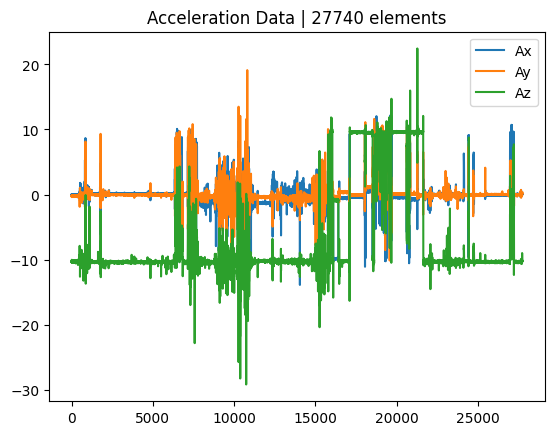

In [5]:
plt.plot(imudata['Ax'], label='Ax')
plt.plot(imudata['Ay'], label='Ay')
plt.plot(imudata['Az'], label='Az')
plt.legend()
plt.title('Acceleration Data | ' + str(imudata.shape[0]) + " elements" )
plt.show()
# print(imudata)

## Accelerometer usable imudata m/s^2

Number of rows 3076 (3076, 14)


/var/folders/tp/gxh8qwy15j73y5xzvn4gch1c0000gn/T/ipykernel_47211/2811723543.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imu_data['Az'] = imu_data["Az"] + getOffsetAZ()


Text(0.5, 1.0, 'Acceleration Data | 3076 elements')

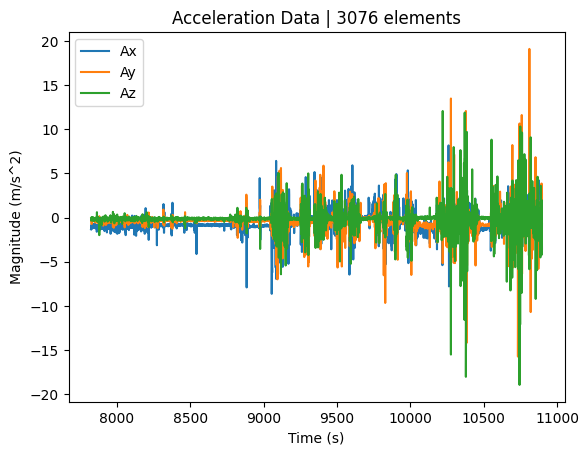

In [6]:
# Based on the frirst test BT
fromTimestamp = 1670682991406230449
untilTimestamp = 1670684529378910779


# Convert start and end timestamps to datetime format
start_timestamp = fromTimestamp #pd.to_datetime(fromTimestamp, unit='ns')
end_timestamp = untilTimestamp #pd.to_datetime(untilTimestamp, unit='ns')

# Filter rows between the start and end timestamps
imu_data = imudata[(imudata['timestamp'] >= start_timestamp) & (imudata['timestamp'] <= end_timestamp)]

imu_data['Az'] = imu_data["Az"] + getOffsetAZ()

# Convert timestamp to datetime
# imu_data['timestamp'] = pd.to_datetime(imu_data['timestamp'])
# Format timestamp to a human-readable string
# imu_data['timestamp'] = imu_data['timestamp'].dt.strftime('%M')

# print("last imu point at {}".format(imu_data.iloc[imu_data.size]["timestamp"]))
# print("last imu point at {}".format(imu_data.row))
print("Number of rows " + str(len(imu_data)), imu_data.shape)

plt.plot(imu_data['Ax'], label='Ax')
plt.plot(imu_data['Ay'], label='Ay')
plt.plot(imu_data['Az'], label='Az')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Magnitude (m/s^2)')
plt.title('Acceleration Data | ' + str(imu_data.shape[0]) + " elements" )


In [7]:
def showPlot(x,y,z, labelx, labely,labelz):
    #  Create a figure with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

    # Plot the first column in the first subplot
    # ax1.plot(filtered_imu_data['timestamp'], filtered_imu_data['Ax'])
    ax1.plot(x)
    ax1.set_title(labelx, fontdict={"fontsize": 10}, loc="left")
    ax1.axes.yaxis.grid(visible=True)
    ax1.set_xticklabels([])

    # Plot the second column in the second subplot
    ax2.plot(y)
    ax2.set_title(labely, fontdict={"fontsize": 10}, loc="left")
    ax2.axes.yaxis.grid(visible=True)
    ax2.set_xticklabels([])

    # Plot the third column in the third subplot
    ax3.plot(z)
    ax3.set_title(labelz, fontdict={"fontsize": 10}, loc="left")
    ax3.axes.yaxis.grid(visible=True)

    # Show the plot
    plt.show()
   

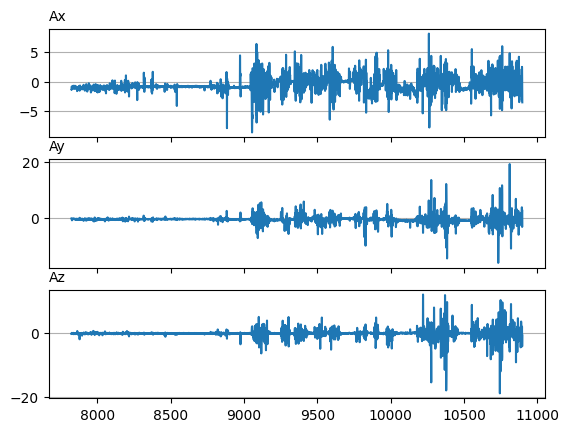

In [8]:
x = imu_data['Ax']
y = imu_data['Ay']
z = imu_data['Az']
showPlot(x,y,z,"Ax","Ay","Az")

In [26]:
pd.options.mode.chained_assignment = None  # default='warn'
# imu_data = imudata #[(imudata['timestamp'] >= start_timestamp) & (imudata['timestamp'] <= end_timestamp)]

ax = imu_data["Ax"]
ay = imu_data["Ay"]
az = imu_data["Az"]

# Root mean square
rms_x = np.sqrt(np.mean(ax ** 2))
rms_y = np.sqrt(np.mean(ay ** 2))
rms_z = np.sqrt(np.mean(az ** 2))
print("Root mean square   Ax={}  | Ay={}   | Az={}".format(rms_x, rms_y, rms_z))

# Standard deviation
std_x = np.std(ax)
std_y = np.std(ay)
std_z = np.std(az)
print("Standard deviation Ax={}  | Ay={}   | Az={}".format(std_x, std_y, std_z))

# Set the threshold value
threshold = rms_z

def showFilteredAz(start:int, end:int):

    # fig, (az1, az2, az3) = plt.subplots(3, 1)
    fig, (az2, az3) = plt.subplots(2, 1)

    target = imu_data.iloc[start:end]
    targetAz = target["Az"]
    # targetcolors = []

    mean_z = np.mean(targetAz)
    median_z = np.median(targetAz)
    mode_z = stats.mode(targetAz)
    print("MeanZ {}  |  MedianZ {} ModeZ {}".format(mean_z, median_z, mode_z.mode))

    firtsVal = target.iloc[0]["timestamp"]
    lastVal = target.iloc[target.shape[0] - 1]["timestamp"]
    # Convert timestamp to datetime
    firtsVal = pd.to_datetime(firtsVal)
    lastVal = pd.to_datetime(lastVal)
    # Format timestamp to a human-readable string
    # lastVal = lastVal.dt.strftime('%Y-%m-%d %H:%M:%S')
    
    print("points from {} to {}".format(firtsVal,lastVal))

    # threshold = rms_z
    # for value in targetAz:
    #     if abs(value) < threshold:
    #         targetcolors.append('green')
    #     else:
    #         targetcolors.append('red')
    
    # az1.scatter(range(len(targetAz)), targetAz, c=targetcolors, label='Az')
    # az1.set_xticklabels([])

    az2.plot(range(len(targetAz)), targetAz)
    az2.set_title("Az", fontdict={"fontsize": 10}, loc="left")

    frequency_data = np.fft.fft(targetAz)
    # Calculate the PSD
    psd = np.abs(frequency_data) ** 2
    az3.plot(psd)
    az3.set_title("Az PSD", fontdict={"fontsize": 10}, loc="left")

    plt.show()


    # plt.plot(targetAz, label='Az')
    # plt.legend()
    # plt.xlabel('Time (s)')
    # plt.ylabel('Magnitude (m/s^2)')
    # plt.title('Acceleration Data | ' + str(target.shape[0]) + " elements" )

# def showMovingFilteredAz(start:int, end:int):

#     target = imu_data.iloc[start:end]
#     targetAz = target["Az"]
#     window_size = 10
#     filtered_data = []

#     # Iterate over the y-axis acceleration data
#     for i in range(len(targetAz)):
#         # Calculate the start and end index of the window
#         start_index = max(i - window_size, 0)
#         end_index = min(i + window_size + 1, len(targetAz))
        
#         # Calculate the moving average for the window
#         window_data = targetAz[start_index:end_index]
#         moving_average = sum(window_data) / len(window_data)
        
#         # Append the moving average to the filtered data list
#         filtered_data.append(moving_average)
    
    
#     plt.plot(filtered_data label='Az')
#     plt.legend()
#     plt.ylabel('Magnitude (m/s^2)')
#     plt.title('Acceleration Data | ' + str(imu_data.shape[0]) + " elements" )
#     plt.show()



Root mean square   Ax=1.3832320315504518  | Ay=1.4784102940810342   | Az=1.4652880720907364
Standard deviation Ax=1.2933653350325578  | Ay=1.4157419232498993   | Az=1.458341086043292


MeanZ -0.1267852745250009  |  MedianZ -0.03824593500000084 ModeZ [-1.77635684e-15]
points from 2022-12-10 14:57:21.459642171 to 2022-12-10 14:59:00.959631919


/var/folders/tp/gxh8qwy15j73y5xzvn4gch1c0000gn/T/ipykernel_47211/1846120571.py:34: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_z = stats.mode(targetAz)


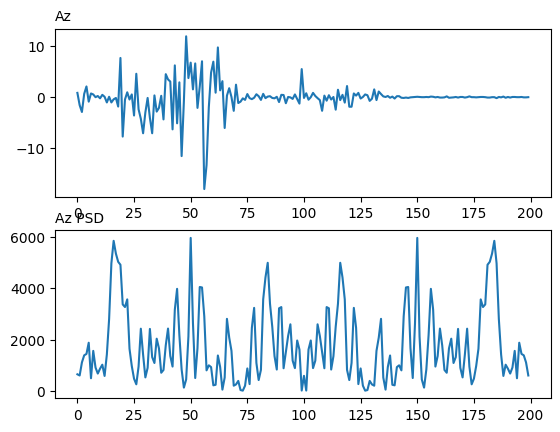

In [14]:
fromn = 2500
to = 2700

showFilteredAz(fromn,to)
# showMovingFilteredAz(fromn, to)



## Appliyng the threshold to a moving filter

In [ ]:
def proccesing(data : pd.Series, window_size=50):
    window_std = np.std(data)
    

3058
18


/var/folders/tp/gxh8qwy15j73y5xzvn4gch1c0000gn/T/ipykernel_47211/4069437081.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classified_data = classified_data.append(pd.DataFrame({'rough': rough_data}, index=rough_indices))


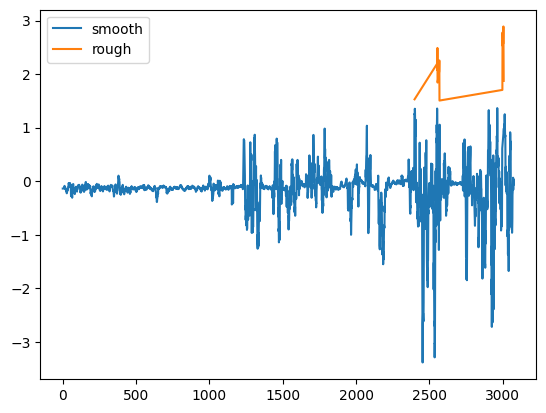

In [28]:

# Create a moving average filter
def moving_average(data, window_size):
    convolved = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    return np.pad(convolved, (window_size-1,0), mode='edge')

# Apply the moving average filter to the z-axis data
window_size = 10
filtered2_data = moving_average(az, window_size)

# Define the threshold
threshold = std_z

# # Classify the data as smooth or rough
smooth_indices = np.where(filtered2_data < threshold)[0]
smooth_data = filtered2_data[filtered2_data < threshold]
rough_indices = np.where(filtered2_data >= threshold)[0]
rough_data = filtered2_data[filtered2_data >= threshold]
print(len(smooth_data))
print(len(rough_data))

# Create a new dataframe to store the classified data
classified_data = pd.DataFrame({'smooth': smooth_data}, index=smooth_indices)
classified_data = classified_data.append(pd.DataFrame({'rough': rough_data}, index=rough_indices))

# Plot the classified data
classified_data.plot(kind='line')
plt.show()

# # Plot the classified data
# classified_data.plot(kind='line')
# plt.show()

In [13]:
# Set the window size
window_size = 10

# Set the threshold for RMS value
rms_threshold = 0.1

# Set the threshold for standard deviation
std_threshold = 0.05

# Create an empty list to store the segments
# smoothsegments = []
# roughsegments = []

targetaz = az
segmenteddata = imu_data

# Iterate over the z-axis acceleration data
for i in range(len(targetaz)):
    # Calculate the start and end index of the window
    start_index = max(i - window_size, 0)
    end_index = min(i + window_size + 1, len(targetaz))
    
    # Extract thhe window data
    window_data = targetaz[start_index:end_index]
    
    # Calculate the RMS value
    rms = np.sqrt(np.mean(np.square(window_data)))
    
    # Calculate the standard deviation
    std = np.std(window_data)
    
    # Determine if the segment is smooth or rough
    if rms < rms_threshold and std < std_threshold:
        # smoothsegments.append('smooth')

        # segmenteddata.iloc[start_index:end_index].assign({"smooth": True})
    else:
        # roughsegments.append('rough')
        # segmenteddata.iloc[start_index:end_index].assign({"smooth": False})


print(len(smoothsegments))
print(len(roughsegments))

# # Create a list of x values
# x = range(len(segments))

# # Create a list of y values
# y = [i for i in range(len(az))]

# # Create a list of colors
# colors = []
# for segment in segments:
#     if segment == 'smooth':
#         colors.append('green')
#     else:
#         colors.append('red')

# # Create the line plot
# plt.scatter(x,y, c=colors)
# plt.xlabel('Data point')
# plt.ylabel('Segment')
# plt.title('Line plot of segments')
# plt.show()


5
3071


/var/folders/tp/gxh8qwy15j73y5xzvn4gch1c0000gn/T/ipykernel_47211/1376849590.py:21: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  window_data = az[start_index:end_index]


/var/folders/tp/gxh8qwy15j73y5xzvn4gch1c0000gn/T/ipykernel_16604/3601899423.py:34: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_z = stats.mode(az)


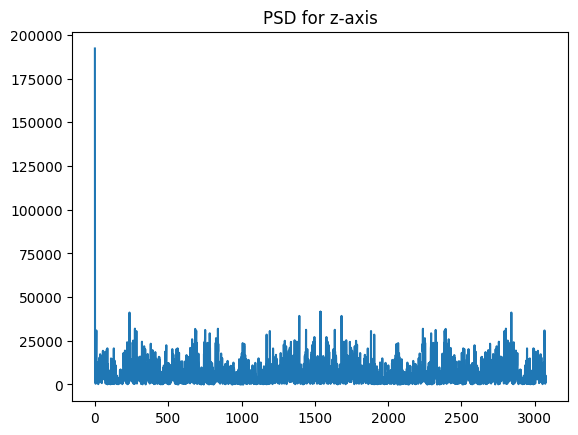

In [144]:

# Frequency domain features
# fs = 100 # assuming 100Hz sampling frequency
# fs = 2 

# FFT for x-axis
# frequency_data_x = np.fft.fft(ax)

# PSD for x-axis
# psd_x = np.abs(frequency_data_x) ** 2

# FFT for y-axis
# frequency_data_y = np.fft.fft(ay)

# PSD for y-axis
# psd_y = np.abs(frequency_data_y) ** 2

# FFT for z-axis
# frequency_data_z = np.fft.fft(az)

# PSD for z-axis
# psd_z = np.abs(frequency_data_z) ** 2

# Statistical features
# mean_x = np.mean(ax)
# median_x = np.median(ax)
# mode_x = stats.mode(ax)

# mean_y = np.mean(ay)
# median_y = np.median(ay)
# mode_y = stats.mode(ay)



# Plot the PSD - the power spectral density 
# plt.subplot(3, 1, 1)
# plt.plot(psd_x)
# plt.title('PSD for x-axis')
# plt.subplot(3, 1, 2)
# plt.plot(psd_y)
# plt.title('PSD for y-axis')
# plt.plot(psd_z)
# plt.title('PSD for z-axis')
# plt.show()


## Gyroscope imudata rad/s

In [ ]:
plt.plot(imudata['Wx'], label='Wx [rad/s]')
plt.plot(imudata['Wy'], label='Wy')
plt.plot(imudata['Wz'], label='Wz')
plt.legend()
plt.show()

## Magnetometer imudata in uT (micro Tesla)

In [ ]:
plt.plot(imudata['Mx'], label='Mx [uT]')
plt.plot(imudata['My'], label='My [uT]')
plt.plot(imudata['Mz'], label='Mz [uT]')
plt.legend()
plt.show()

## Pressure (Pa), Temp (°C) and altitude (m)

In [ ]:
plt.plot(imudata['pressure'], label='Pressure [Pa]')
plt.plot(imudata['temperature'], label='Temperature [°C]')
plt.plot(imudata['altitude'], label='Altitude [m]')
plt.legend()
plt.show()